## Pendulum: Two-step Method

In [1]:
import sys
#sys.path.append('/Users/josorior/Documents/UW/research/keql/KEQL/source')
#sys.path.append('/Users/yasaminjalalian/Repos/KEQL/source')
sys.path.append('/home/juanfelipe/Desktop/research/keql/source')

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_ridge import KernelRidge
from parameter_learning import *
from plotlib import *
from models import *
from data_loader import * 

In [3]:
import os

os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [4]:
model = 'pendulum'

In [5]:
# 2-step dictionary
keys = ['optim_sgm_u','optim_nugget_u','rkhs_u','optim_sgm_P','optim_nugget_P','nugget_P', 'rkhs_P']
two_step_dict = dict.fromkeys(keys)

### Solution: Two-Step Method

> Step 1: Learning $u's$

In [6]:
optim_sgm_u, alphas, optim_nugget_u = kernel_parameters(x_train.reshape(-1,1), u_train, e)

In [7]:
# Save true values to be used in one-step
two_step_dict['optim_sgm_u'] = optim_sgm_u
two_step_dict['optim_nugget_u'] = optim_nugget_u
optim_sgm_u, optim_nugget_u

(array([0.14840741, 0.88888889, 0.88888889]),
 array([4.28133240e-14, 6.95192796e-12, 6.95192796e-12]))

In [8]:
u_pred_train, u_x_pred_train, u_xx_pred_train = predictions_ode(x_train, x_train, Gaussian, optim_sgm_u, alphas, e , e)
u_pred_test,  u_x_pred_test,  u_xx_pred_test  = predictions_ode(x_test,  x_train, Gaussian, optim_sgm_u, alphas, e, e_test)

In [9]:
# Save true values to warm up the onepfive method
np.save('data/u_pred_train.npy', u_pred_train)
# Save true gradients for comparing later
np.save('data/u_x_train.npy',u_x_train)
np.save('data/u_xx_train.npy',u_xx_train)
# Save gradients for one step method
np.save('data/u_x_pred_train.npy',u_x_pred_train)
np.save('data/u_xx_pred_train.npy',u_xx_pred_train)
np.save('data/u_x_pred_test.npy',u_x_pred_test)
np.save('data/u_xx_pred_test.npy',u_xx_pred_test)

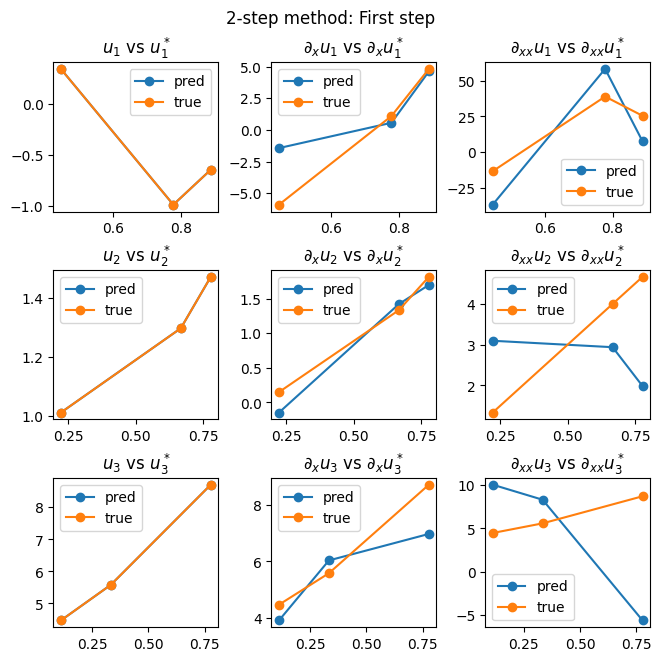

In [10]:
# Plot at training points
fig, axs = plt.subplots(nrows = 3, ncols=3 , figsize = (6.5,6.5),constrained_layout=True)
fig.suptitle('2-step method: First step')
axs[0, 0].plot(x_train[:e], u_pred_train[:,0],marker= 'o', label = 'pred')
axs[0, 0].plot(x_train[:e], u_train[:,0],marker= 'o', label = 'true')
axs[0, 0].legend()
axs[0, 0].set_title('$u_1$ vs $u_1^*$')
axs[0, 1].plot(x_train[:e], u_x_pred_train[:,0],marker= 'o', label = 'pred')
axs[0, 1].plot(x_train[:e], u_x_train[:,0],marker= 'o', label = 'true')
axs[0, 1].legend()
axs[0, 1].set_title('$\partial_x u_1$ vs $\partial_x u_1^*$')
axs[0, 2].plot(x_train[:e], u_xx_pred_train[:,0],marker= 'o', label = 'pred')
axs[0, 2].plot(x_train[:e], u_xx_train[:,0],marker= 'o', label = 'true')
axs[0, 2].legend()
axs[0, 2].set_title('$\partial_{xx} u_1$ vs $\partial_{xx} u_1^*$')
axs[1, 0].plot(x_train[e:2*e], u_pred_train[:,1],marker= 'o', label = 'pred')
axs[1, 0].plot(x_train[e:2*e], u_train[:,1],marker= 'o', label = 'true')
axs[1, 0].legend()
axs[1, 0].set_title('$u_2$ vs $u_2^*$')
axs[1, 1].plot(x_train[e:2*e], u_x_pred_train[:,1],marker= 'o', label = 'pred')
axs[1, 1].plot(x_train[e:2*e], u_x_train[:,1],marker= 'o', label = 'true')
axs[1, 1].legend()
axs[1, 1].set_title('$\partial_x u_2$ vs $\partial_x u_2^*$')
axs[1, 2].plot(x_train[e:2*e], u_xx_pred_train[:,1],marker= 'o', label = 'pred')
axs[1, 2].plot(x_train[e:2*e], u_xx_train[:,1],marker= 'o', label = 'true')
axs[1, 2].legend()
axs[1, 2].set_title('$\partial_{xx} u_2$ vs $\partial_{xx} u_2^*$')
axs[2, 0].plot(x_train[2*e:3*e], u_pred_train[:,2],marker= 'o', label = 'pred')
axs[2, 0].plot(x_train[2*e:3*e], u_train[:,2],marker= 'o', label = 'true')
axs[2, 0].legend()
axs[2, 0].set_title('$u_3$ vs $u_3^*$')
axs[2, 1].plot(x_train[2*e:3*e], u_x_pred_train[:,2],marker= 'o', label = 'pred')
axs[2, 1].plot(x_train[2*e:3*e], u_x_train[:,2],marker= 'o', label = 'true')
axs[2, 1].legend()
axs[2, 1].set_title('$\partial_x u_3$ vs $\partial_x u_3^*$')
axs[2, 2].plot(x_train[2*e:3*e], u_xx_pred_train[:,2],marker= 'o', label = 'pred')
axs[2, 2].plot(x_train[2*e:3*e], u_xx_train[:,2],marker= 'o', label = 'true')
axs[2, 2].legend()
axs[2, 2].set_title('$\partial_{xx} u_3$ vs $\partial_{xx} u_3^*$')
fig.show()

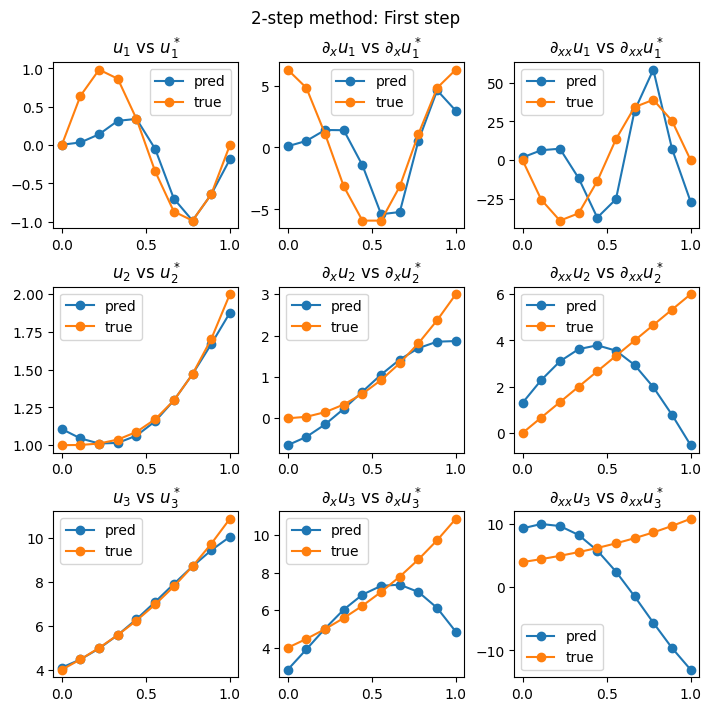

In [11]:
# Plot at testing points
fig, axs = plt.subplots(nrows = 3, ncols=3 , figsize = (7,7),constrained_layout=True)
fig.suptitle('2-step method: First step')
axs[0, 0].plot(x_test[:e_test], u_pred_test[:,0],marker= 'o', label = 'pred')
axs[0, 0].plot(x_test[:e_test], u_test[:,0],marker= 'o', label = 'true')
axs[0, 0].legend()
axs[0, 0].set_title('$u_1$ vs $u_1^*$')
axs[0, 1].plot(x_test[:e_test], u_x_pred_test[:,0],marker= 'o', label = 'pred')
axs[0, 1].plot(x_test[:e_test], u_x_test[:,0],marker= 'o', label = 'true')
axs[0, 1].legend()
axs[0, 1].set_title('$\partial_x u_1$ vs $\partial_x u_1^*$')
axs[0, 2].plot(x_test[:e_test], u_xx_pred_test[:,0],marker= 'o', label = 'pred')
axs[0, 2].plot(x_test[:e_test], u_xx_test[:,0],marker= 'o', label = 'true')
axs[0, 2].legend()
axs[0, 2].set_title('$\partial_{xx} u_1$ vs $\partial_{xx} u_1^*$')
axs[1, 0].plot(x_test[e_test:2*e_test], u_pred_test[:,1],marker= 'o', label = 'pred')
axs[1, 0].plot(x_test[e_test:2*e_test], u_test[:,1],marker= 'o', label = 'true')
axs[1, 0].legend()
axs[1, 0].set_title('$u_2$ vs $u_2^*$')
axs[1, 1].plot(x_test[e_test:2*e_test], u_x_pred_test[:,1],marker= 'o', label = 'pred')
axs[1, 1].plot(x_test[e_test:2*e_test], u_x_test[:,1],marker= 'o', label = 'true')
axs[1, 1].legend()
axs[1, 1].set_title('$\partial_x u_2$ vs $\partial_x u_2^*$')
axs[1, 2].plot(x_test[e_test:2*e_test], u_xx_pred_test[:,1],marker= 'o', label = 'pred')
axs[1, 2].plot(x_test[e_test:2*e_test], u_xx_test[:,1],marker= 'o', label = 'true')
axs[1, 2].legend()
axs[1, 2].set_title('$\partial_{xx} u_2$ vs $\partial_{xx} u_2^*$')
axs[2, 0].plot(x_test[2*e_test:3*e_test], u_pred_test[:,2],marker= 'o', label = 'pred')
axs[2, 0].plot(x_test[2*e_test:3*e_test], u_test[:,2],marker= 'o', label = 'true')
axs[2, 0].legend()
axs[2, 0].set_title('$u_3$ vs $u_3^*$')
axs[2, 1].plot(x_test[2*e_test:3*e_test], u_x_pred_test[:,2],marker= 'o', label = 'pred')
axs[2, 1].plot(x_test[2*e_test:3*e_test], u_x_test[:,2],marker= 'o', label = 'true')
axs[2, 1].legend()
axs[2, 1].set_title('$\partial_x u_3$ vs $\partial_x u_3^*$')
axs[2, 2].plot(x_test[2*e_test:3*e_test], u_xx_pred_test[:,2],marker= 'o', label = 'pred')
axs[2, 2].plot(x_test[2*e_test:3*e_test], u_xx_test[:,2],marker= 'o', label = 'true')
axs[2, 2].legend()
axs[2, 2].set_title('$\partial_{xx} u_3$ vs $\partial_{xx} u_3^*$')
fig.show()

RKHSs norms squared of each $u_i^*$

In [12]:
rkhs_u = []
for i in range(3):
    G = K(Gaussian,x_train[e*i:e*(i+1)],x_train[e*i:e*(i+1)],optim_sgm_u[i])
    alphas = np.linalg.solve(G, u_pred_train[:,i])
    rkhs_u.append(np.dot(u_pred_train[:,i],alphas))
for i in range(3):
    print('RKHS^2 norm of u^*_{}: {}'.format(i+1,round(rkhs_u[i],2)))
# Save true values to be used in one-step
#np.save('data/rkhs_u.npy', np.array(rkhs_u))
two_step_dict['rkhs_u'] = rkhs_u

RKHS^2 norm of u^*_1: 1.18
RKHS^2 norm of u^*_2: 10.12
RKHS^2 norm of u^*_3: 136.21


We compute the norms of $u_i^*$'s since they are more regular than $u_i$'s.

> Step 2: Learning $P$

In [13]:
s_train = np.hstack((x_train_all.reshape(-1,1),u_train.T.reshape(-1,1),u_x_pred_train.T.reshape(-1,1),u_xx_pred_train.T.reshape(-1,1)))  # 30 * 4
s_test = np.hstack((x_test_all.reshape(-1,1),u_test.T.reshape(-1,1),u_x_pred_test.T.reshape(-1,1),u_xx_pred_test.T.reshape(-1,1)))  # 30 * 4
f_train = f_Train(model)
f_test = f_Test(model,e_test)
scaler_s_train = MinMaxScaler()
s_train_s = scaler_s_train.fit_transform(s_train)
s_test_s = scaler_s_train.transform(s_test)

In [14]:
optim_sgm_P, optim_nugget_P = grid_search_RBF(s_train_s,f_train)

# Save true values to be used in one-step
two_step_dict['optim_sgm_P'] = optim_sgm_P
two_step_dict['optim_nugget_P'] = optim_nugget_P

krr_optimal_P = KernelRidge(kernel='rbf', alpha = optim_nugget_P, gamma=1/(2*(optim_sgm_P**2))) 
krr_optimal_P.fit(s_train_s, f_train) 
f_pred_train = krr_optimal_P.predict(s_train_s) 
f_pred_test = krr_optimal_P.predict(s_test_s)

In [15]:
print('Bandwith of P^*:{}  Nugget of P^*: {:.2e}'.format(round(optim_sgm_P,3),optim_nugget_P))

Bandwith of P^*:0.815  Nugget of P^*: 1.83e-13


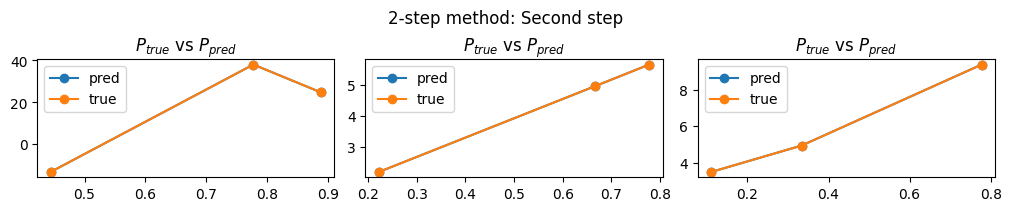

In [16]:
# Plot at training points
fig, axs = plt.subplots(nrows = 1, ncols=3 , figsize = (10, 2),constrained_layout=True)
fig.suptitle('2-step method: Second step')
axs[0].plot(x_train[:e], f_pred_train[:e], marker= 'o', label = 'pred')
axs[0].plot(x_train[:e], f_train[:e] , marker= 'o', label = 'true')
axs[0].legend()
axs[0].set_title('$P_{true}$ vs $P_{pred}$')
axs[1].plot(x_train[e:2*e], f_pred_train[e:2*e],marker= 'o', label = 'pred')
axs[1].plot(x_train[e:2*e], f_train[e:2*e],marker= 'o', label = 'true')
axs[1].legend()
axs[1].set_title('$P_{true}$ vs $P_{pred}$')
axs[2].plot(x_train[2*e:3*e], f_pred_train[2*e:3*e],marker= 'o', label = 'pred')
axs[2].plot(x_train[2*e:3*e], f_train[2*e:3*e],marker= 'o', label = 'true')
axs[2].legend()
axs[2].set_title('$P_{true}$ vs $P_{pred}$')
fig.show()

Only use markers for the interpolating points and add more points for the testing.

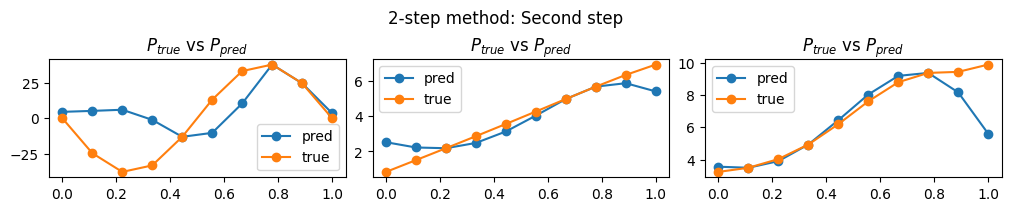

In [17]:
# Plot at testing points
fig, axs = plt.subplots(nrows = 1, ncols=3 , figsize = (10, 2),constrained_layout=True)
fig.suptitle('2-step method: Second step')
axs[0].plot(x_test[:e_test], f_pred_test[:e_test], marker= 'o', label = 'pred')
axs[0].plot(x_test[:e_test], f_test[:e_test] , marker= 'o', label = 'true')
axs[0].legend()
axs[0].set_title('$P_{true}$ vs $P_{pred}$')
axs[1].plot(x_test[e_test:2*e_test], f_pred_test[e_test:2*e_test],marker= 'o', label = 'pred')
axs[1].plot(x_test[e_test:2*e_test], f_test[e_test:2*e_test],marker= 'o', label = 'true')
axs[1].legend()
axs[1].set_title('$P_{true}$ vs $P_{pred}$')
axs[2].plot(x_test[2*e_test:3*e_test], f_pred_test[2*e_test:3*e_test],marker= 'o', label = 'pred')
axs[2].plot(x_test[2*e_test:3*e_test], f_test[2*e_test:3*e_test],marker= 'o', label = 'true')
axs[2].legend()
axs[2].set_title('$P_{true}$ vs $P_{pred}$')
fig.show()

RKHS norm squared of $P^*$

In [18]:
# rkhs_P
nugget_P = 1e-7
G = K(Gaussian,s_train_s,s_train_s, optim_sgm_P) + nugget_P*np.eye(x_train.size) # added nugget here !
alphas_P = np.linalg.solve(G, f_pred_train)
rkhs_P = np.dot(f_pred_train,alphas_P)
print('RKHS^s norm of P^*: {}'.format(round(rkhs_P,2)))
# Save true values to be used in one-step
# np.save('data/rkhs_P.npy', rkhs_P)
# np.save('data/nugget_P.npy', nugget_P)
two_step_dict['rkhs_P'] = rkhs_P
two_step_dict['nugget_P'] = nugget_P

RKHS^s norm of P^*: 4038.85


Test

> Compute std of feature 1 $\sigma_{\text{s[:,1]}}$ of `s_train` and perturb feature 1 of `s_train` using $m \sigma_{\text{s[:,1]}}$ each element. $m \in (0.01,0.25)$.

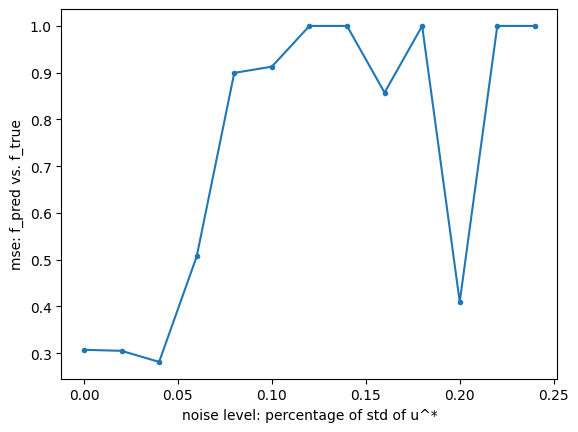

In [20]:
# Compute std per feature of s_train_s
stds = np.std(s_train, axis = 0)
beta = np.arange(0.0,0.25,0.02)
scales = np.outer(beta, stds)
mses_P = [] 
for i in range(len(scales)):
    # Scales for current iteration
    scale = scales[i,:]
    # Copy s_train
    s_test = s_train
    # Perturb feature that contains u^* - Do this 10 times and average !!!
    s_test[:,1] = np.random.normal(s_train[:,1] , scale = scale[1])
    # Apply step one to perturbed u's 
    optim_sgm, alphas, optim_lmbd = kernel_parameters(x_train.reshape(-1,1), s_test[:,1].reshape(3,3).T, e)
    _, u_x_pred, u_xx_pred = predictions_ode(x_train, x_train, Gaussian, optim_sgm, alphas, e , e)
    s_test[:,2] = u_x_pred.T.reshape(-1,1).flatten()
    s_test[:,3] = u_xx_pred.T.reshape(-1,1).flatten()
    # Scale the new s_test
    s_test_s = scaler_s_train.transform(s_test)
    # Compute predictions on test
    f_pred_test = krr_optimal_P.predict(s_test_s)
    # True test -> Why if I use this rule for s_test_s the bellow rule cannot be compared with f_pred_test
    f_true_test = f_true_Test(model, s_test)
    # Compute mse per scale 
    mses_P.append(mean_squared_error(f_true_test,f_pred_test)/mean_squared_error(0*f_true_test,f_true_test))
# Plot - We have a vector of dimension 4 of scales vs. mses
plt.plot(beta,mses_P,'.-')
plt.xlabel('noise level: percentage of std of u^*')
plt.ylabel('mse: f_pred vs. f_true')
plt.show()

In [19]:
np.save('data/two_step_dict.npy',two_step_dict)